<a href="https://colab.research.google.com/github/krucas/projekt_na_pandas_ski/blob/main/Bakary_sales_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cvičení na knihovnu 📚 Pandas, ⤴ Grafy a 🎨 barvy
## **Prodej v pekárně The Bread Basket bakery**
🥐



V tomto cvičení budeme vizualizovat údaje o prodeji v pekárně The Bread Basket v Edinburghu za roky 2016-2017.

Data pocházejí ze sady zveřejněné na webu kaggle s licencí CC0.

**Obsah datové sady**

 V níže importovaném souboru bakery_sales.csv se nachází
*20 507* položek přiřazených k
*9 684* klientským transakcím s informacemi o:




*   TransactionNo - číslo transakce
*   Items - nakoupené položky
*   DateTime - čas transakce
*   Daypart - dení doba
*   DayType - den v týdnu nebo víkend




###Pojďme si společně projít jednotlivé kroky, které je potřeba provést k získání výsledků. 🗣









In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

Nahrajeme si soubor bakery_sales a rovnou změníme format datového typu DateTime.

In [39]:

bakery_data = pd.read_csv('/bakery_sales.csv', parse_dates=['DateTime'])
bakery_data['DateTime'] = bakery_data['DateTime'].dt.strftime('%Y-%m-%d')
bakery_data.info()
bakery_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


<ipython-input-39-cf37b94cc77c>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bakery_data = pd.read_csv('/bakery_sales.csv', parse_dates=['DateTime'])


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30,Morning,Weekend
1,2,Scandinavian,2016-10-30,Morning,Weekend
2,2,Scandinavian,2016-10-30,Morning,Weekend
3,3,Hot chocolate,2016-10-30,Morning,Weekend
4,3,Jam,2016-10-30,Morning,Weekend


# Ujistíme se, že data obsahují záznamy s chybějícími informacemi pro některý ze sloupců.

In [8]:
"complete records: " + str(len(bakery_data.dropna(how="any"))) + "; total records: " + str(len(bakery_data))

'complete records: 20507; total records: 20507'

In [40]:
 bakery_data["Date"] = bakery_data["DateTime"]

Přejmenujeme sloupec DataTime na Date a spočítám jaký je počet.

In [41]:
bakery_data["Date"].value_counts(ascending= False).head(5)


,count
Date,
2017-04-02,292
2016-05-11,275
2017-04-03,257
2017-03-25,246
2017-01-28,237


Odstraňíme sloupec DateTime který duplikovat sloupec Date.

In [42]:
bakery_data = bakery_data.drop(columns = ['DateTime'])


In [44]:
bakery_data.head(5)

,TransactionNo,Items,Daypart,DayType,Date
0,1,Bread,Morning,Weekend,2016-10-30
1,2,Scandinavian,Morning,Weekend,2016-10-30
2,2,Scandinavian,Morning,Weekend,2016-10-30
3,3,Hot chocolate,Morning,Weekend,2016-10-30
4,3,Jam,Morning,Weekend,2016-10-30


Najdeme 4 TOP produkty, které se prodávají v pekárně.

In [60]:
list(bakery_data["Items"].value_counts().index)[0:5]

['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry']

Přidáme pátý sloupec "Categories", který nám roztřídi zboží mezi TOP 4 a ostatní produkty.

In [61]:
products = list(bakery_data["Items"].value_counts().index)[0:5]
products.append("Other")
products
bakery_data["Item Categories"] = pd.Series(pd.Categorical(bakery_data["Items"], categories=products)).fillna("Other")
bakery_data.head(10)

,TransactionNo,Items,Date,Daypart,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
5,3,Cookies,2016-10-30,Morning,Weekend,Other
6,4,Muffin,2016-10-30,Morning,Weekend,Other
7,5,Coffee,2016-10-30,Morning,Weekend,Coffee
8,5,Pastry,2016-10-30,Morning,Weekend,Pastry
9,5,Bread,2016-10-30,Morning,Weekend,Bread


In [46]:
bakery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionNo    20507 non-null  int64   
 1   Items            20507 non-null  object  
 2   Daypart          20507 non-null  object  
 3   DayType          20507 non-null  object  
 4   Date             20507 non-null  object  
 5   Item Categories  20507 non-null  category
dtypes: category(1), int64(1), object(4)
memory usage: 821.4+ KB


Podívejme se blíže na obsah sloupce Typ dne

In [49]:

bakery_data["DayType"].value_counts()

,count
DayType,
Weekday,12807
Weekend,7700


Podívejme se blíže na obsah sloupce část dne.

In [50]:
bakery_data["Daypart"].value_counts()

,count
Daypart,
Afternoon,11569
Morning,8404
Evening,520
Night,14


Níže lze vidět, kolik produktů a položek bylo zakoupeno denně a v kolika transakcích.

In [62]:
bakery_data["DayType"] = pd.Series(pd.Categorical(bakery_data["DayType"], categories=["Weekday", "Weekend"]))
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Daypart","DayType", "Item Categories"]]
bakery_data.head(5)

,TransactionNo,Items,Date,Daypart,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other


In [58]:
items_daily = bakery_data[["Date","DayType", "Items"]].groupby(["Date", "DayType"]).count()
transactions_daily = bakery_data[["Date","DayType", "TransactionNo"]].groupby(["Date", "DayType"]).nunique()
daytype_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "DayType"])
daytype_statistics_daily.head(15)

<ipython-input-58-5be48becd801>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  items_daily = bakery_data[["Date","DayType", "Items"]].groupby(["Date", "DayType"]).count()
<ipython-input-58-5be48becd801>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions_daily = bakery_data[["Date","DayType", "TransactionNo"]].groupby(["Date", "DayType"]).nunique()


Items  TransactionNo
Date       DayType                      
2016-01-11 Weekday    150             77
           Weekend      0              0
2016-01-12 Weekday     83             47
           Weekend      0              0
2016-02-11 Weekday    164             83
           Weekend      0              0
2016-02-12 Weekday    104             61
           Weekend      0              0
2016-03-11 Weekday    189             95
           Weekend      0              0
2016-03-12 Weekday      0              0
           Weekend    191             88
2016-04-11 Weekday    187             85
           Weekend      0              0
2016-04-12 Weekday      0              0

Kolik produktů a v kolika transakcích bylo denně zakoupeno, rozděleno podle denní doby.

In [59]:
items_daily = bakery_data[["Date","Daypart", "Items"]].groupby(["Date", "Daypart"]).count()
transactions_daily = bakery_data[["Date","Daypart", "TransactionNo"]].groupby(["Date", "Daypart"]).nunique()
daypart_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Daypart"])
daypart_statistics_daily

Items  TransactionNo
Date       Daypart                        
2016-01-11 Afternoon     92             46
           Evening        2              2
           Morning       56             29
2016-01-12 Afternoon     50             28
           Evening        2              2
...                     ...            ...
2017-12-02 Afternoon     50             22
           Evening        2              2
           Morning       61             24
2017-12-03 Afternoon    114             47
           Morning       32             15

[415 rows x 2 columns]

Z coolors.com jsem si nechal vygenerovat paletu barev niže, které budou použity pro grafy.

In [63]:
my_colormap = ListedColormap(colors = ("#ef626c", "#4361ee", "#edf340","#653239","#dbf59f","#1b998b"))

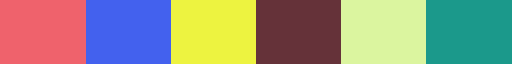

In [64]:
my_colormap

Koláčový graf se bude skládat z níže uvedených produktů vyjádřených v %.


In [67]:
categories_items = bakery_data.groupby("Item Categories").size()
categories_items

<ipython-input-67-6c9e98906830>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_items = bakery_data.groupby("Item Categories").size()


,0
Item Categories,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
Other,8395


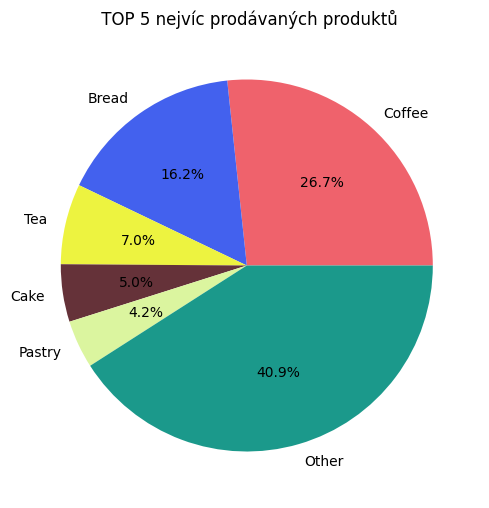

In [72]:
plt.figure(figsize = (6, 8))
plt.pie(categories_items, labels = category_purchases.index, colors=my_colormap.colors, autopct='%1.1f%%')
plt.title(" TOP 5 nejvíc prodávaných produktů")
plt.show()

Bar níže vypočítaný nám představuje počet produktů výjadřený v normě.

In [77]:
categories_items = bakery_data.groupby('Item Categories').size()
bar_graph = round((categories_items - categories_items.min()) / (categories_items.max() - categories_items.min()),2)

<ipython-input-77-0e5ab94cc05c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_items = bakery_data.groupby('Item Categories').size()


In [78]:
bar_graph

,0
Item Categories,
Coffee,0.61
Bread,0.33
Tea,0.08
Cake,0.02
Pastry,0.00
Other,1.00


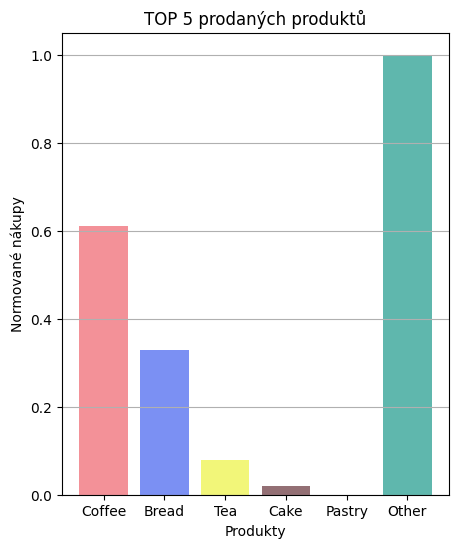

In [80]:
plt.figure(figsize = (5, 6))
plt.bar(bar_graph.index, bar_graph, color=my_colormap.colors, alpha = 0.7)
plt.xticks(rotation=0)
plt.title("TOP 5 prodaných produktů")
plt.xlabel("Produkty")
plt.ylabel("Normované nákupy")
plt.grid(visible = bool, which= 'major', axis = 'y')
plt.show()